# Autoregressive Process - Time Series 

In [1]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import pacf
from statsmodels.regression.linear_model import yule_walker
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## Simulate AR(2) process 

In [2]:
ar2 = np.array([1, 0.33, 0.5])
ma = np.array([1])

simulated_AR2_data = ArmaProcess(ar2, ma).generate_sample(nsample=10000)

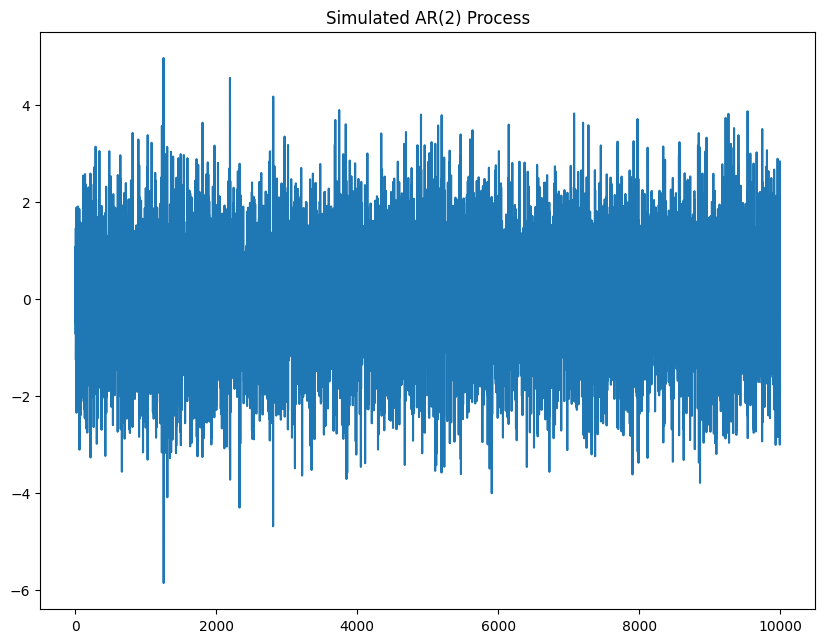

In [3]:
plt.figure(figsize=[10, 7.5]); # Set dimensions for figure
plt.plot(simulated_AR2_data)
plt.title("Simulated AR(2) Process")
plt.show()

In [4]:
pacf_coef_AR2 = pacf(simulated_AR2_data)
print(pacf_coef_AR2)

[ 1.00000000e+00 -2.24554873e-01 -5.07186154e-01  8.00477119e-03
 -1.49598858e-02  7.06604956e-03  8.19002423e-04  8.59835631e-03
 -1.01853422e-04 -3.74887376e-03 -7.62894085e-03 -1.31214124e-02
 -2.38248125e-04  6.30623672e-03 -1.09726850e-02  7.00782596e-03
  1.74308602e-03  6.52188870e-03  5.88696643e-03  9.70003983e-03
 -3.91916518e-03 -1.01809187e-02 -8.05070892e-03  2.69608104e-02
  8.14595709e-03 -5.73958277e-03  1.01380816e-03 -2.49185058e-03
  1.80384626e-03  7.95684308e-03  1.56813802e-02  2.43556637e-03
 -2.93094064e-03 -1.00507185e-02 -2.91495250e-03  3.15987868e-03
 -1.61030819e-02 -7.41493370e-03 -2.84264976e-02  8.88989748e-03
  1.79513833e-03]


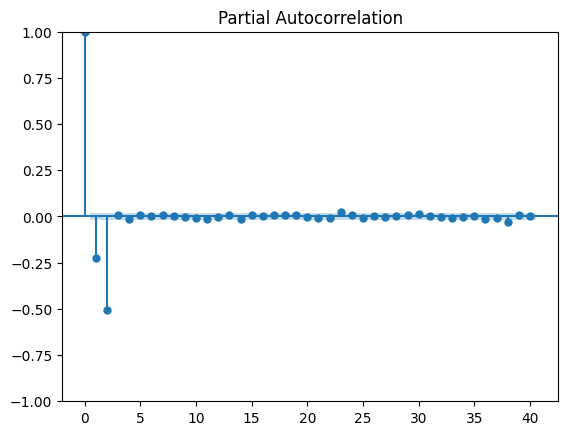

In [5]:
plot_pacf(simulated_AR2_data);

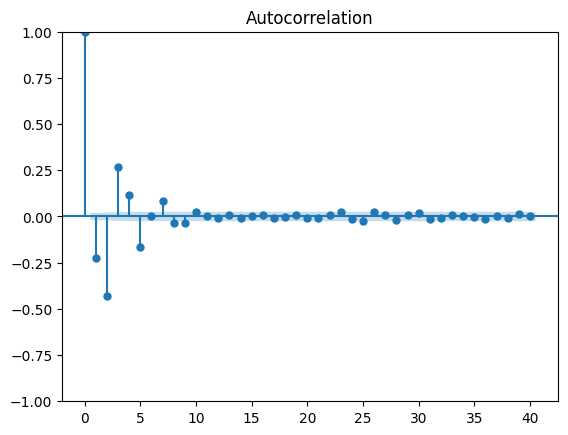

In [6]:
plot_acf(simulated_AR2_data);

In [7]:
rho, sigma = yule_walker(simulated_AR2_data, 2, method='mle')
print(f'rho: {-rho}')
print(f'sigma: {sigma}')

rho: [0.33838817 0.50707933]
sigma: 1.0073957782537193


## Simulate AR(3) Process 

In [8]:
ar3 = np.array([1, 0.33, 0.5, 0.07])
ma = np.array([1])

simulated_AR3_data = ArmaProcess(ar3, ma).generate_sample(nsample=10000)

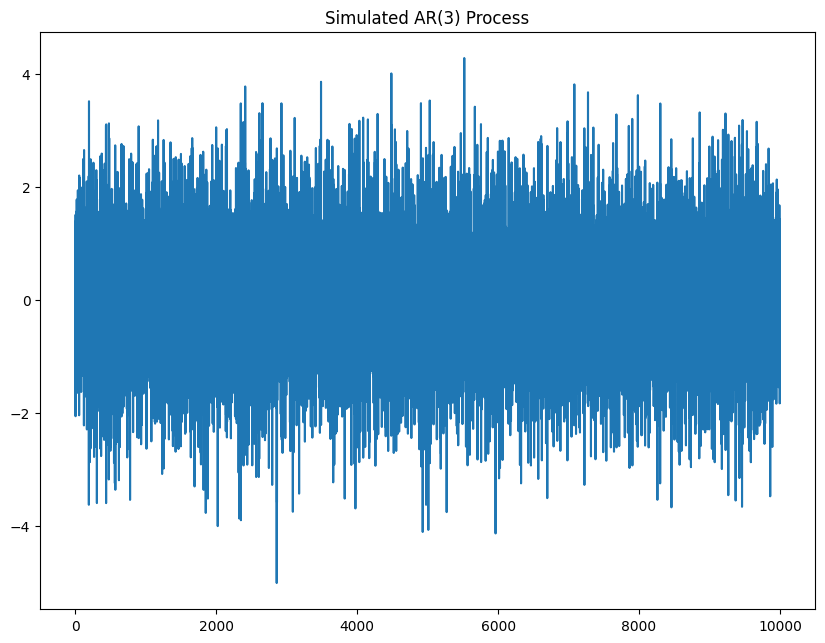

In [9]:
plt.figure(figsize=[10, 7.5]); # Set dimensions for figure
plt.plot(simulated_AR3_data)
plt.title("Simulated AR(3) Process")
plt.show()

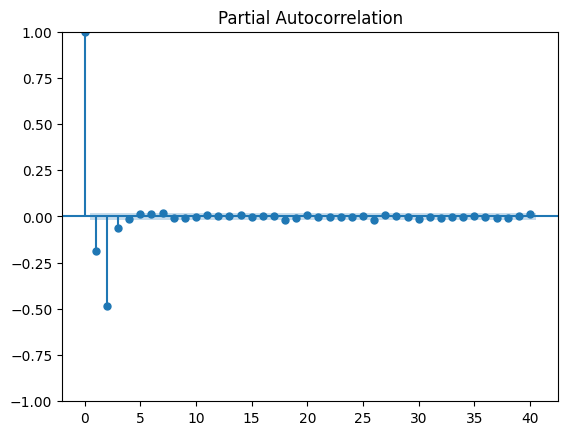

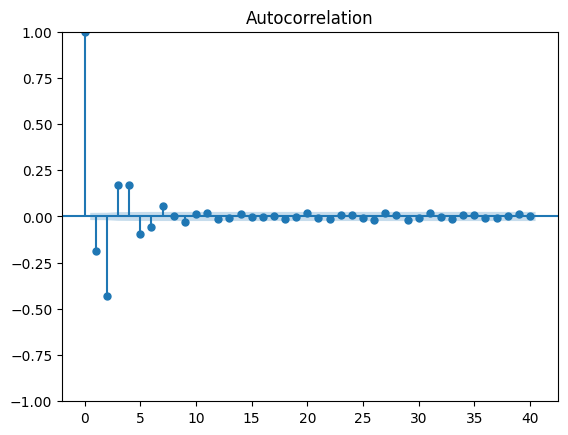

In [10]:
plot_pacf(simulated_AR3_data);
plot_acf(simulated_AR3_data);

In [11]:
rho, sigma = yule_walker(simulated_AR3_data, 3, method='mle')
print(f'rho: {-rho}')
print(f'sigma: {sigma}')

rho: [0.31047803 0.50228815 0.06106992]
sigma: 1.0006243694443944


## Project
### Johnson & Johnson quaterly earning per share modelling

In [12]:
import pandas as pd

In [13]:
data = pd.read_csv('../data/jj.csv')
data.head()

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61


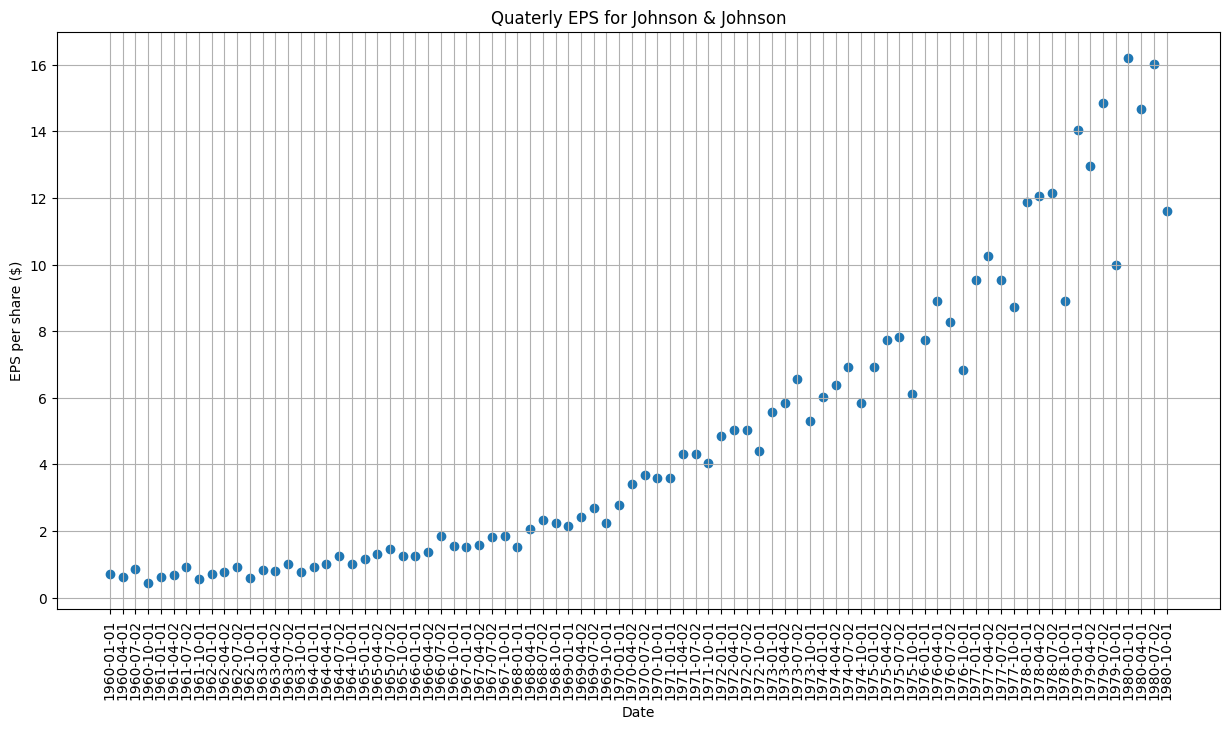

In [14]:
plt.figure(figsize=[15, 7.5]); # Set dimensions for figure
plt.scatter(data['date'], data['data'])
plt.title('Quaterly EPS for Johnson & Johnson')
plt.ylabel('EPS per share ($)')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [15]:
# Take the log difference to make data stationary

data['data'] = np.log(data['data'])
data['data'] = data['data'].diff()
data = data.drop(data.index[0])
data.head()

,date,data
1,1960-04-01,-0.119545
2,1960-07-02,0.299517
3,1960-10-01,-0.658462
4,1961-01-01,0.326684
5,1961-04-02,0.123233


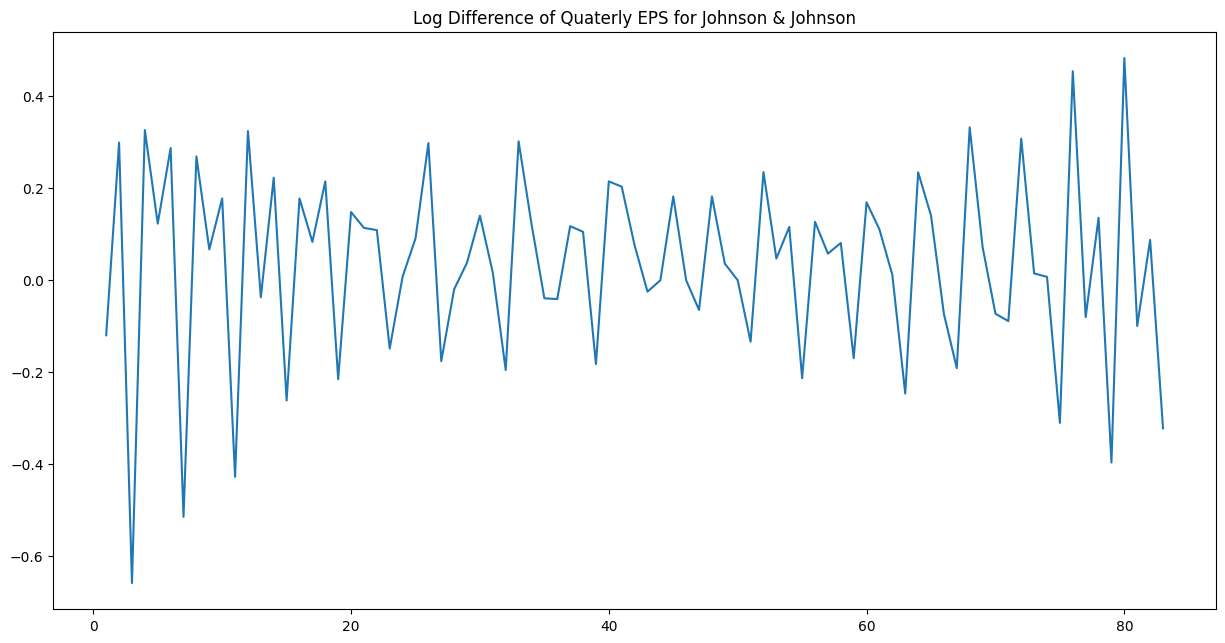

In [16]:
plt.figure(figsize=[15, 7.5]); # Set dimensions for figure
plt.plot(data['data'])
plt.title("Log Difference of Quaterly EPS for Johnson & Johnson")
plt.show()

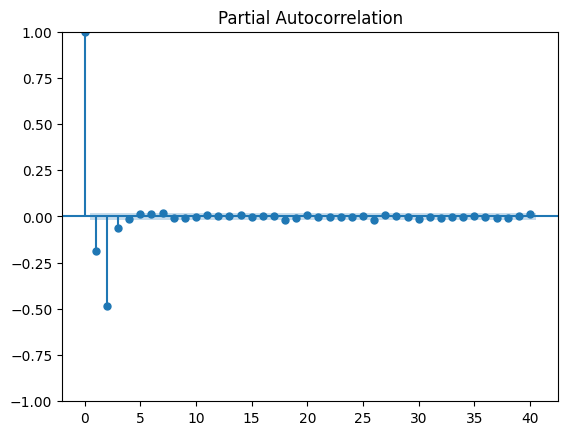

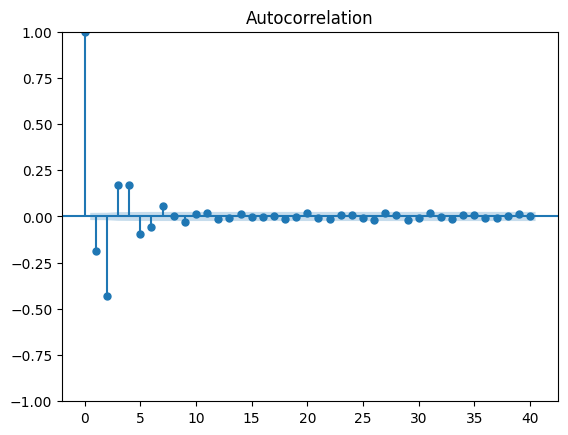

In [17]:
plot_pacf(simulated_AR3_data);
plot_acf(simulated_AR3_data);

In [18]:
# Try a AR(5) model
rho, sigma = yule_walker(data['data'], 5)
print(f'rho: {-rho}')
print(f'sigma: {sigma}')

rho: [ 0.68878493  0.44183118  0.40543803 -0.39895857 -0.18705244]
sigma: 0.1093648131173019
